In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
data = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')

In [72]:
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [74]:
categories = ['num_passengers','sales_channel','trip_type','flight_day','route','booking_origin','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','booking_complete']

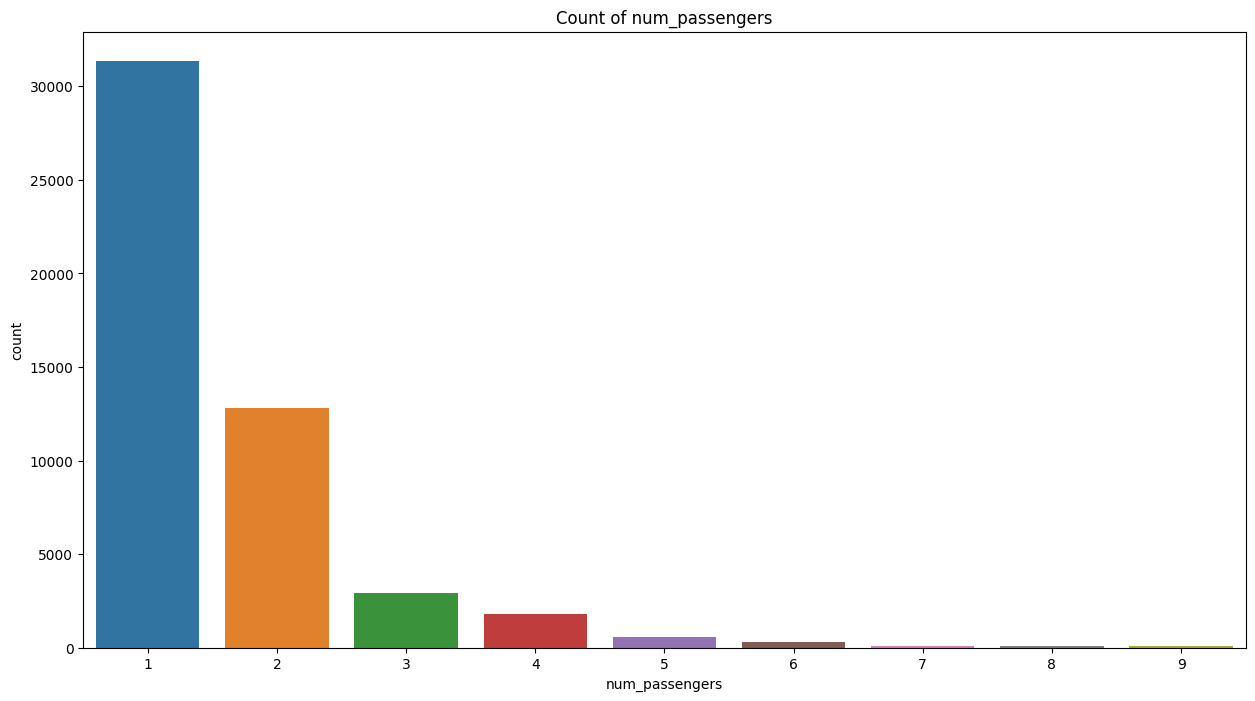

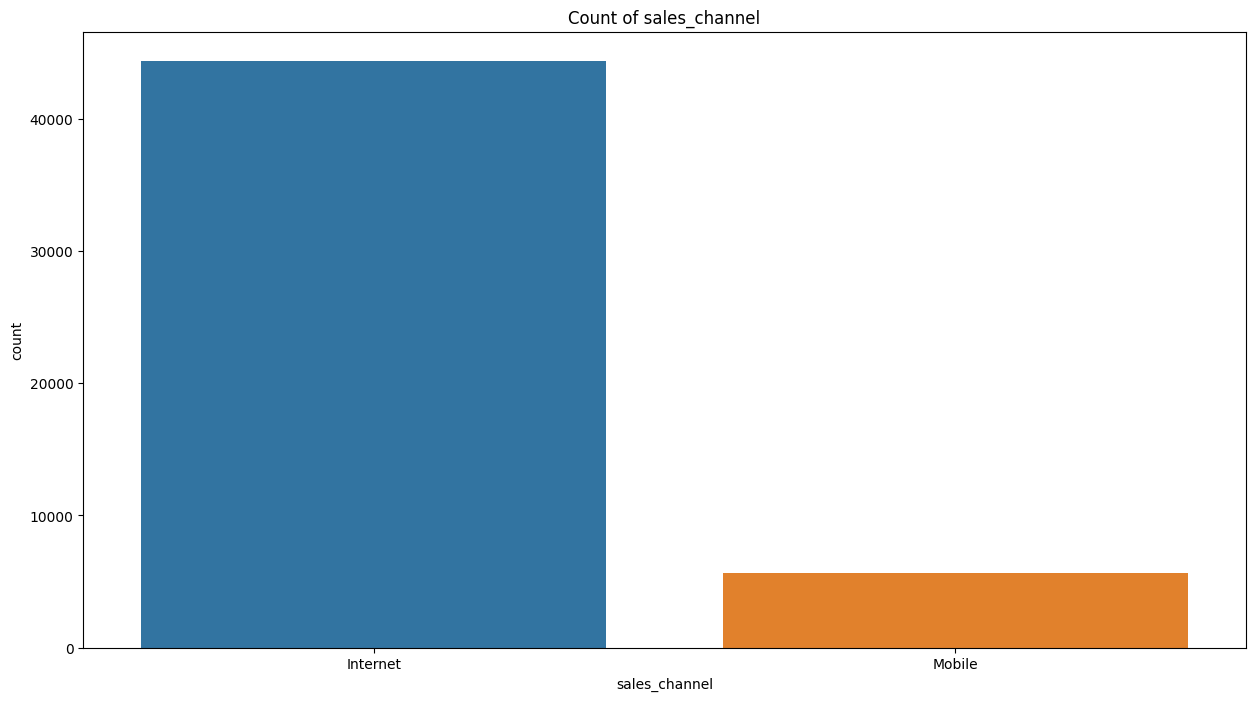

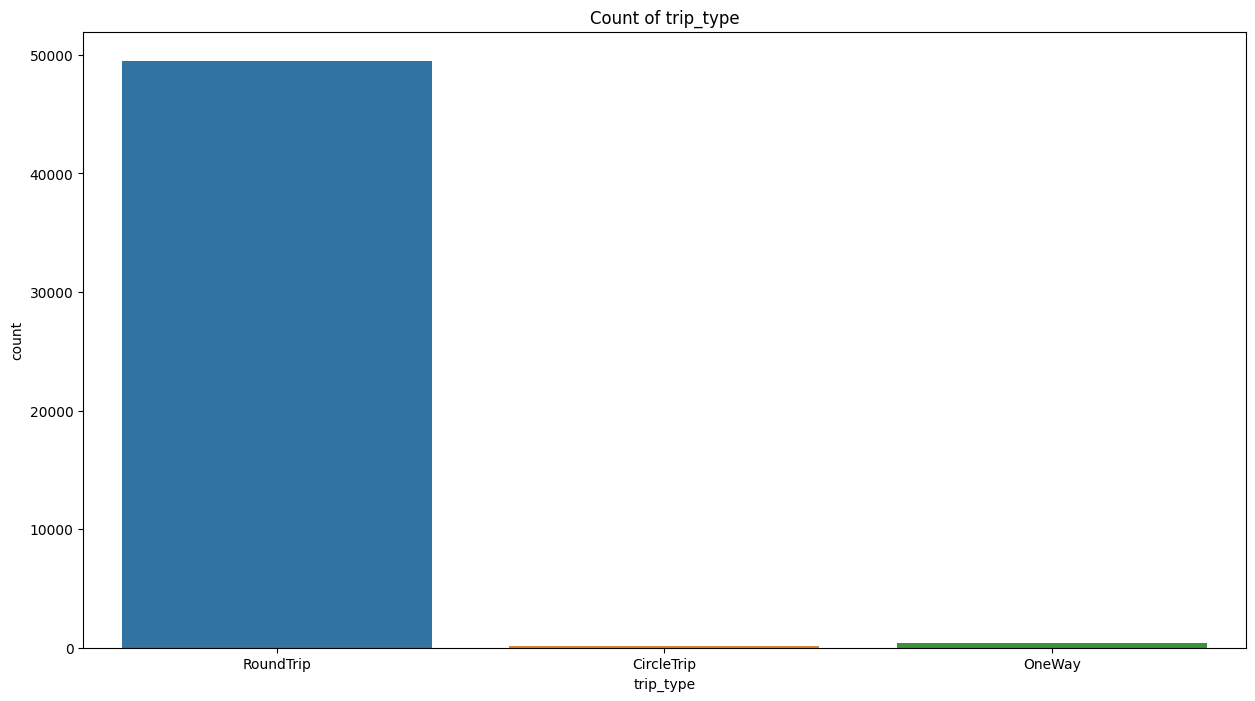

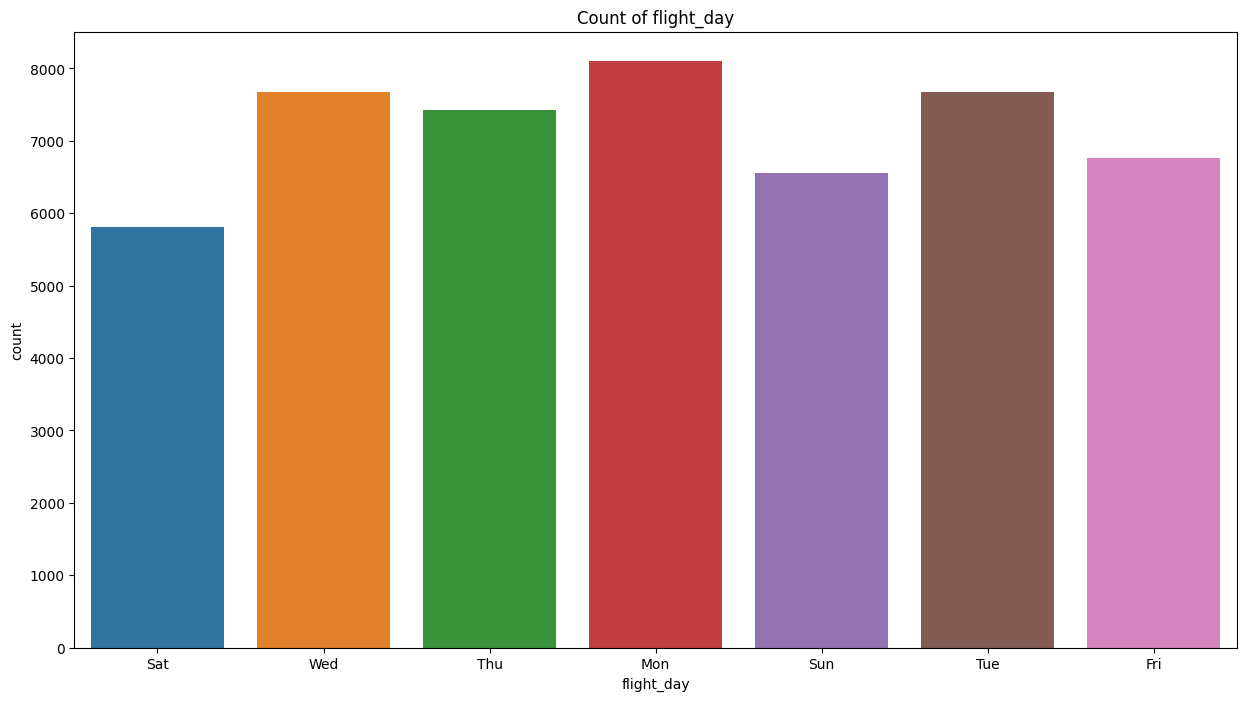

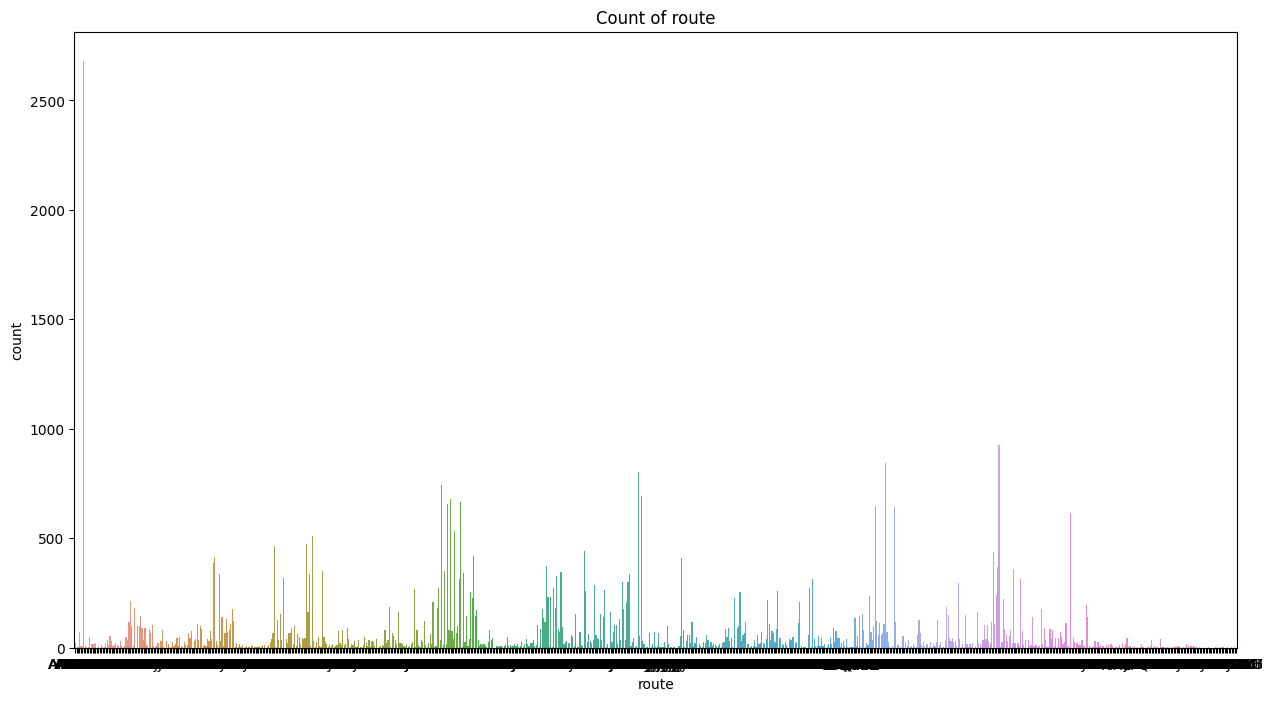

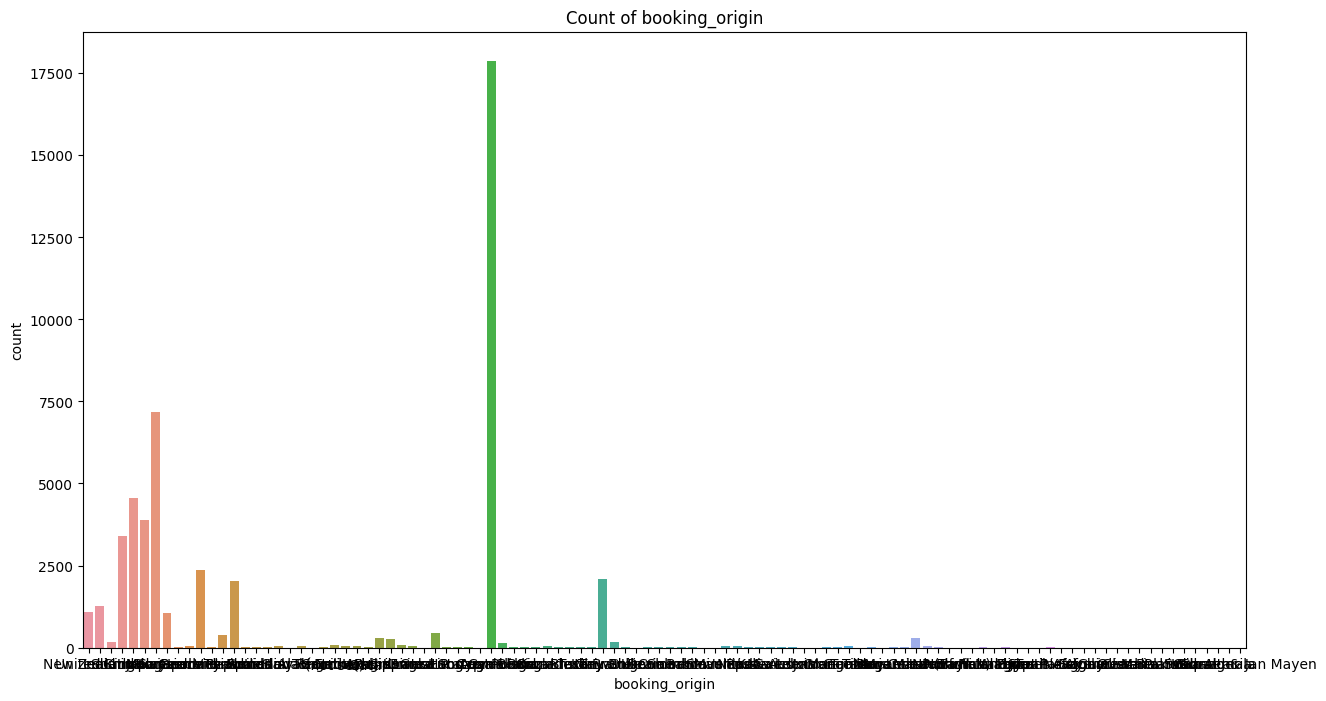

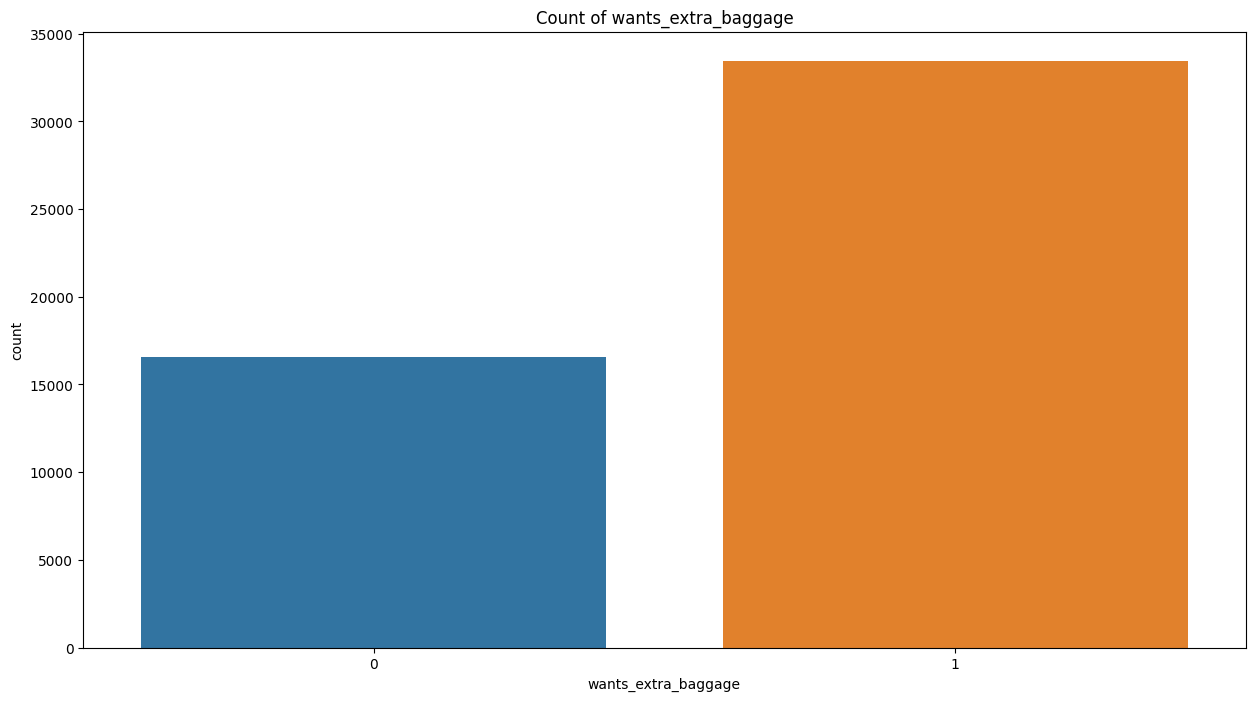

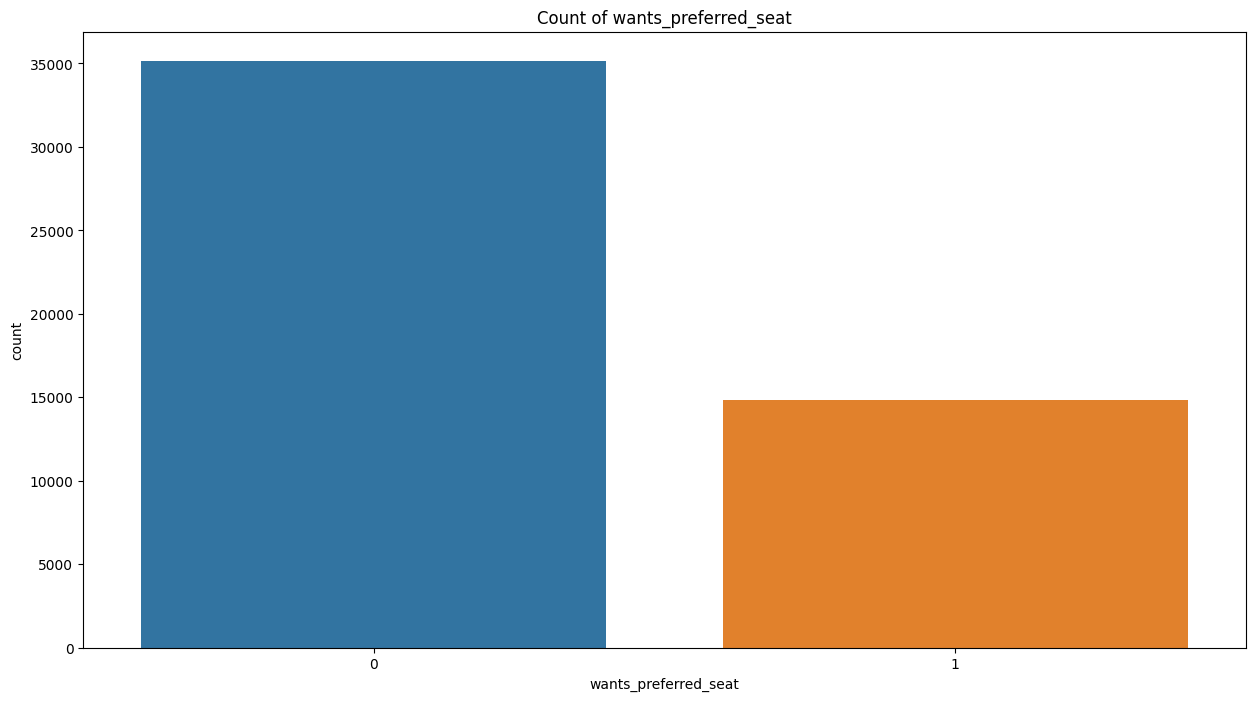

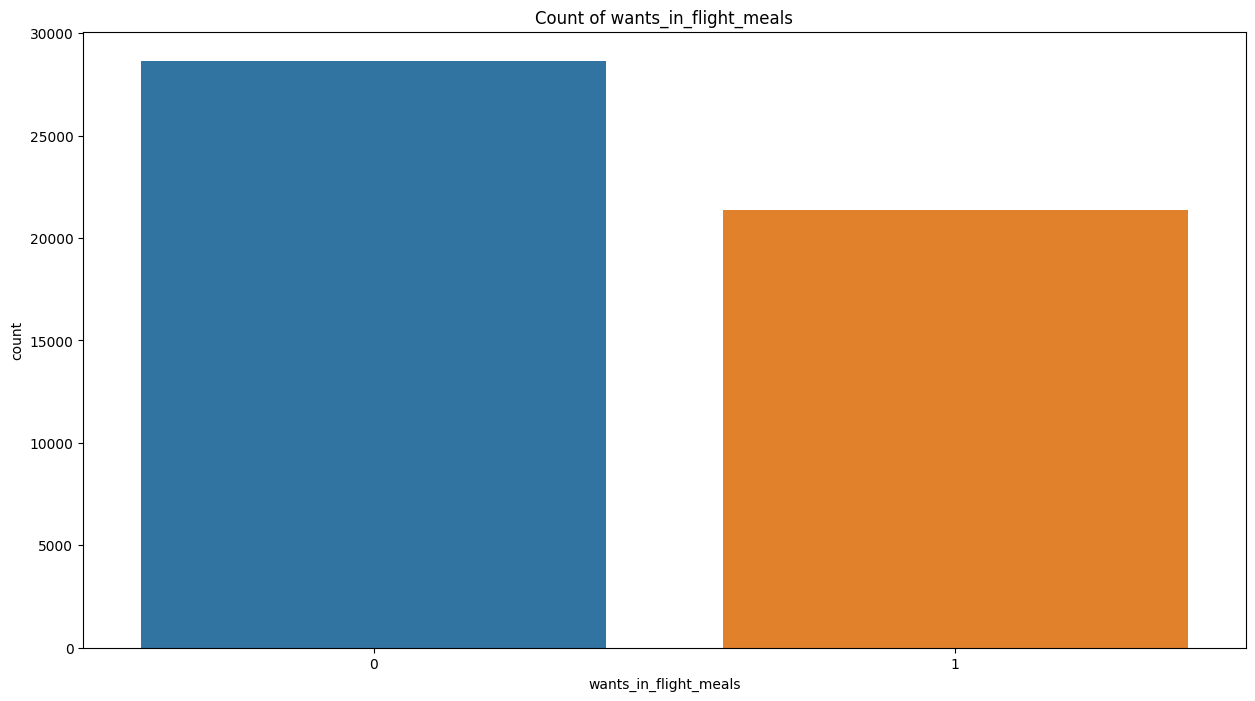

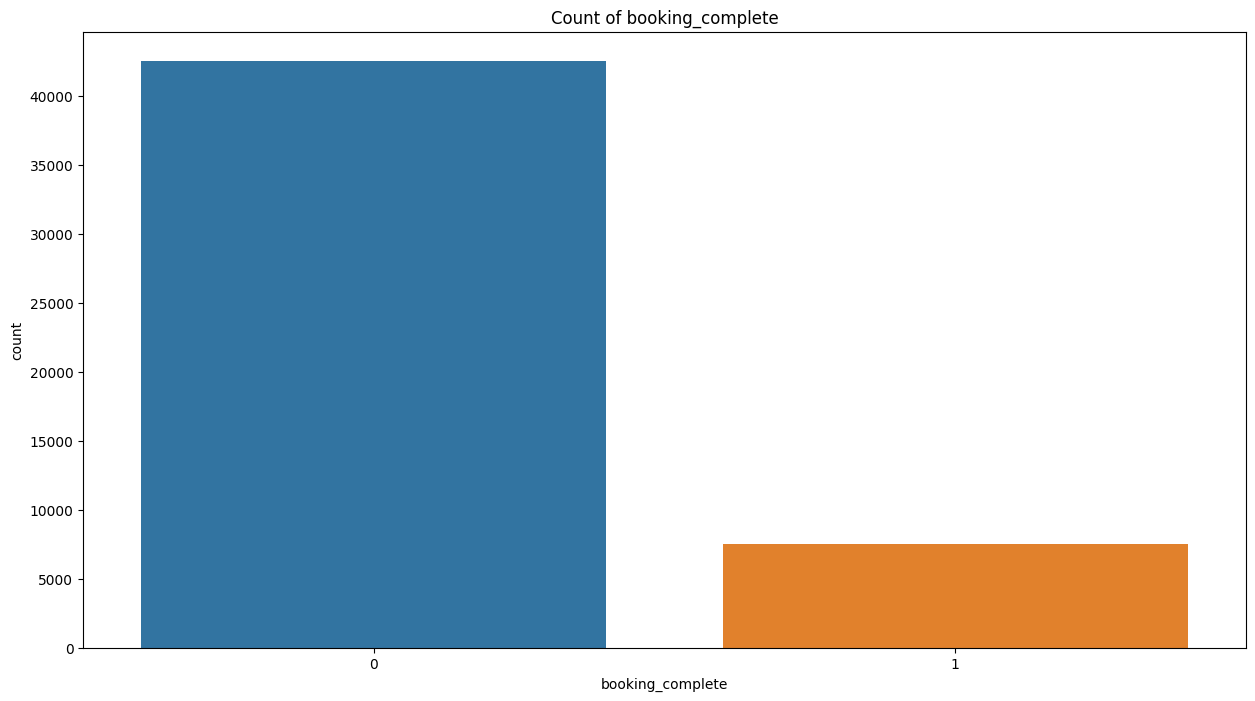

In [75]:
for i in categories:
    plt.figure(figsize=(15,8))
    sns.countplot(x=i, data=data)
    plt.title(f"Count of {i}")
    plt.show()


In [79]:
data = data.drop_duplicates()

No null values

In [80]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


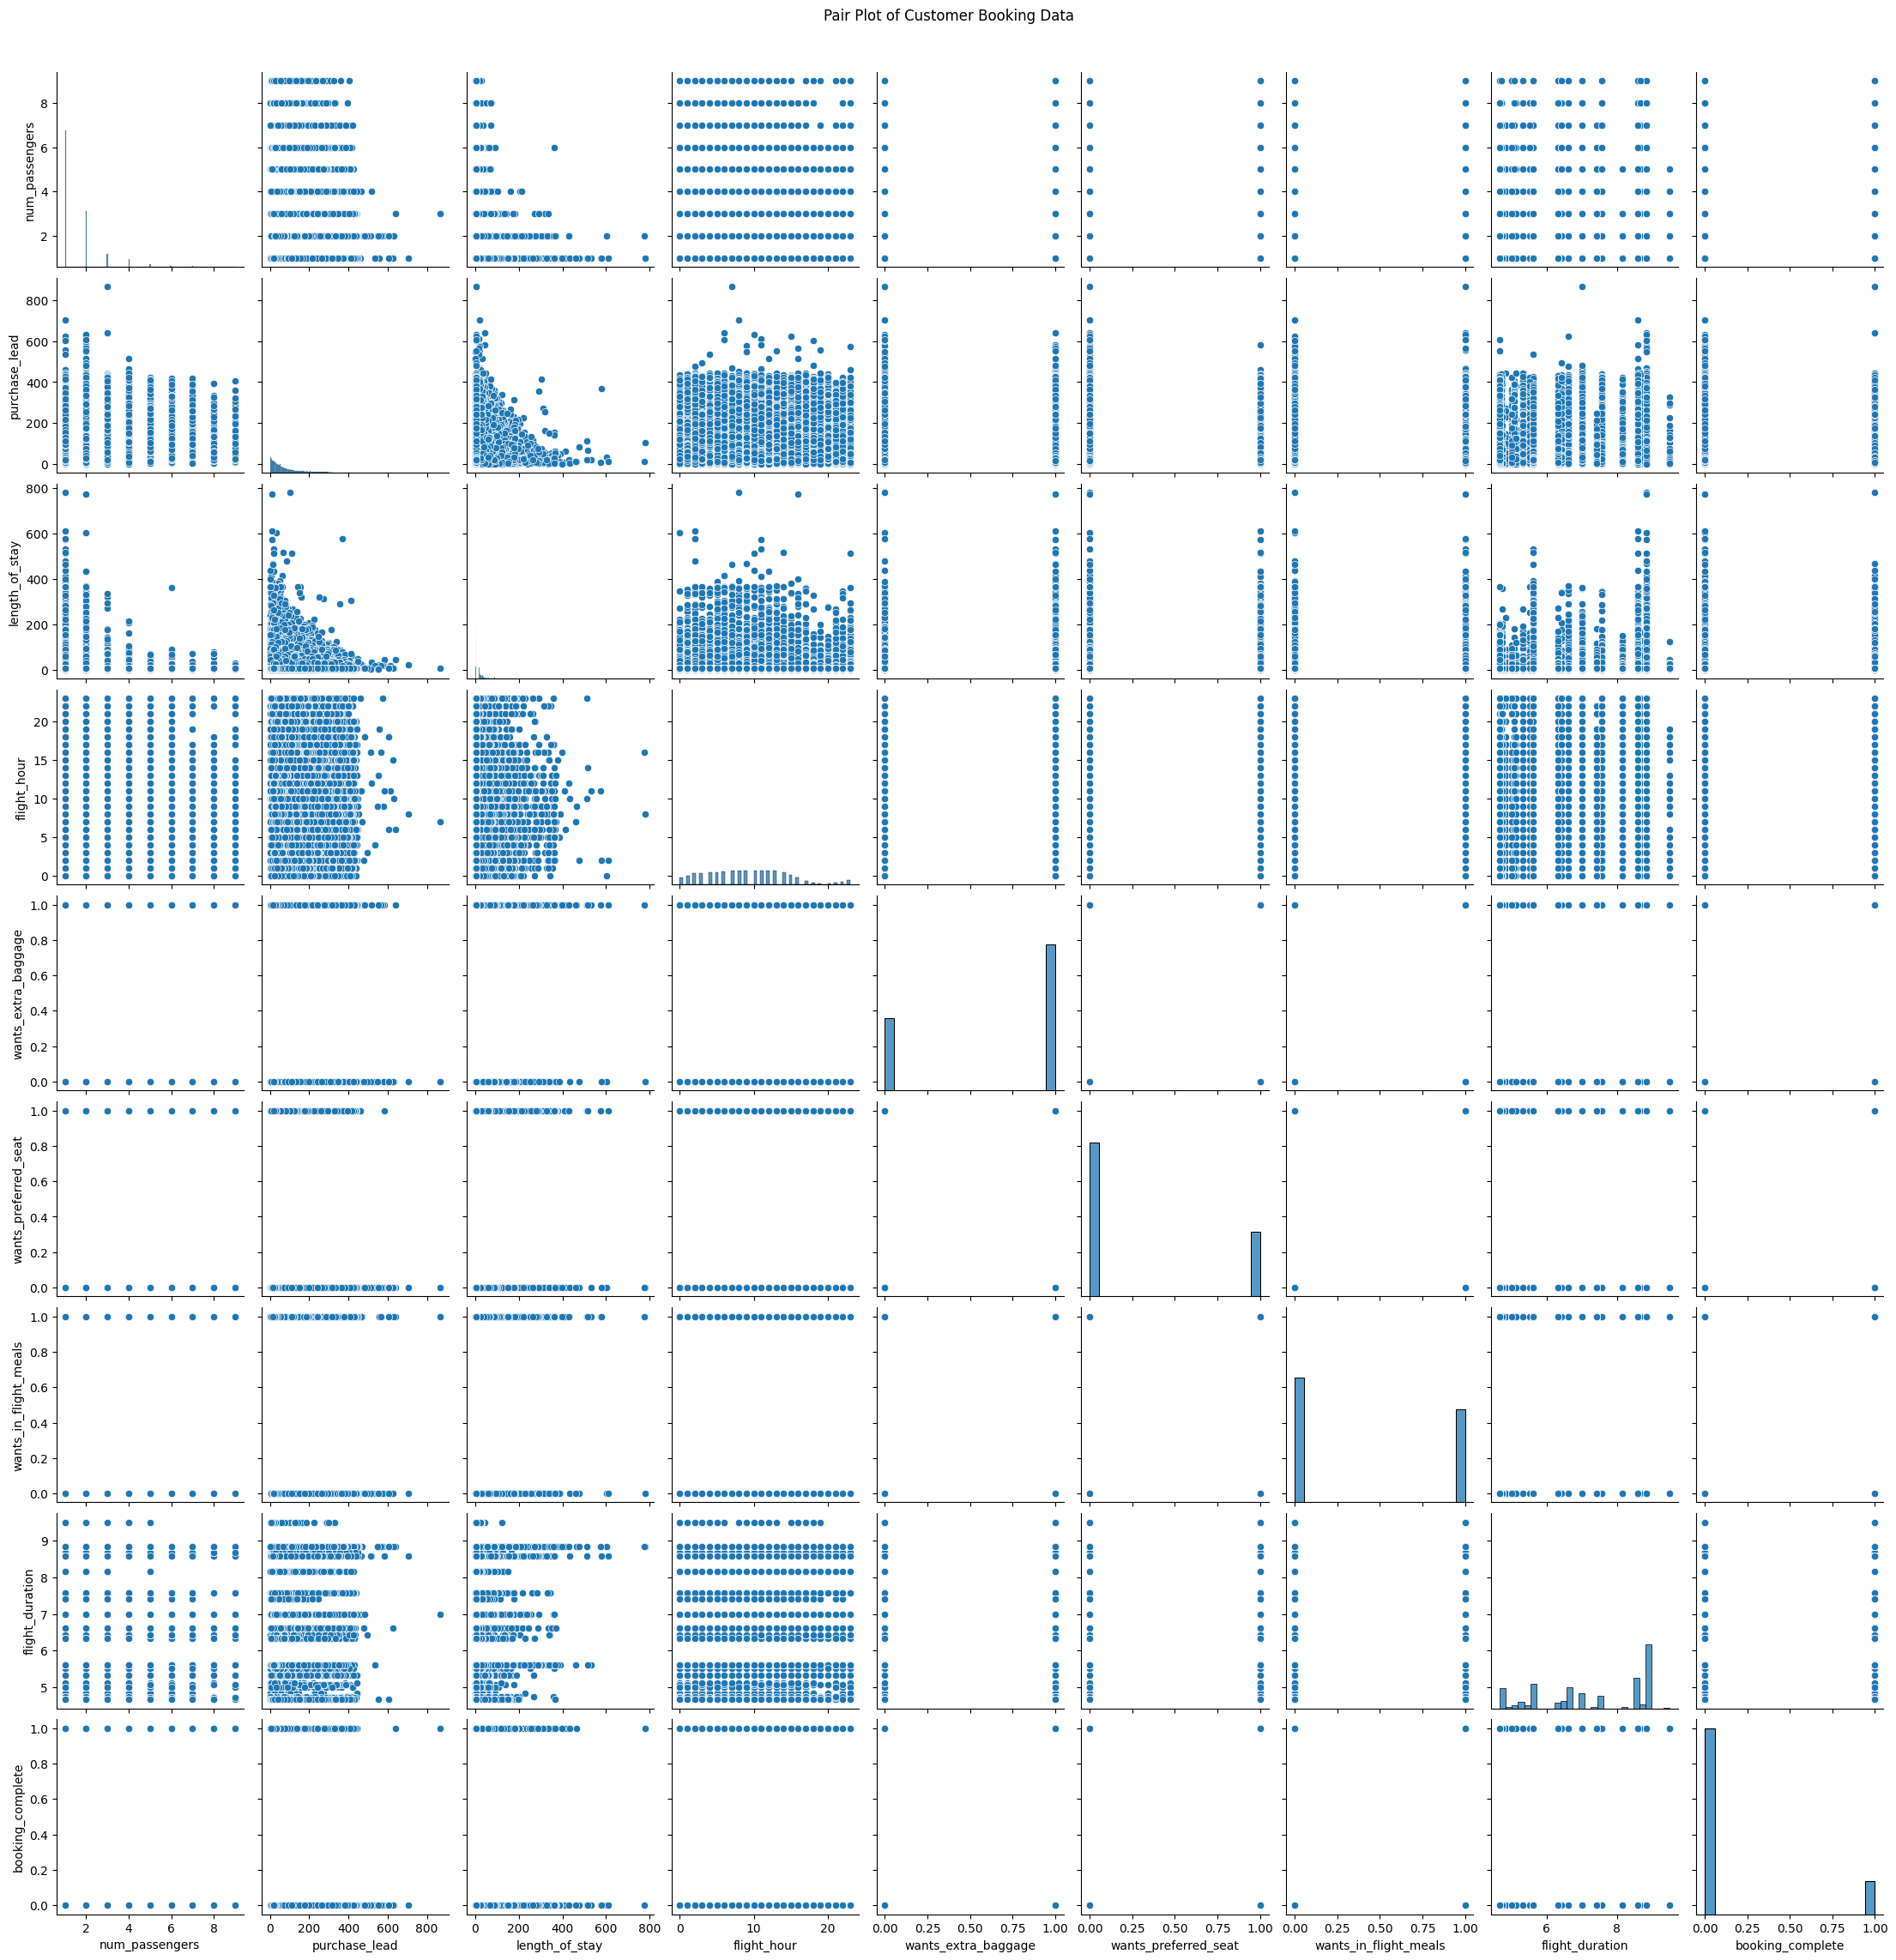

In [81]:
sns.pairplot(numeric_data)
plt.suptitle("Pair Plot of Customer Booking Data", y=1.02)
plt.show()

In [82]:
data['flight_day'].value_counts()

Mon    7988
Wed    7562
Tue    7558
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: flight_day, dtype: int64

In [83]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
data['flight_day'] = pd.Categorical(data['flight_day'], categories=day_order, ordered=True)
data['flight_day'] = data['flight_day'].cat.codes

C:\Users\Mrudula\AppData\Local\Temp\ipykernel_15452\2221666229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['flight_day'] = pd.Categorical(data['flight_day'], categories=day_order, ordered=True)
C:\Users\Mrudula\AppData\Local\Temp\ipykernel_15452\2221666229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['flight_day'] = data['flight_day'].cat.codes


In [86]:
data = pd.get_dummies(data, columns=['sales_channel'], drop_first=True)
data = pd.get_dummies(data, columns=['trip_type'], drop_first=True)

In [101]:
route_freq = data['route'].value_counts()
data['route_encoded'] = data['route'].map(route_freq)

In [106]:
data['booking_origin_encoded'] = data['booking_origin'].map(data['booking_origin'].value_counts())

In [109]:
data1 = data.drop(['route','booking_origin'], axis=1)

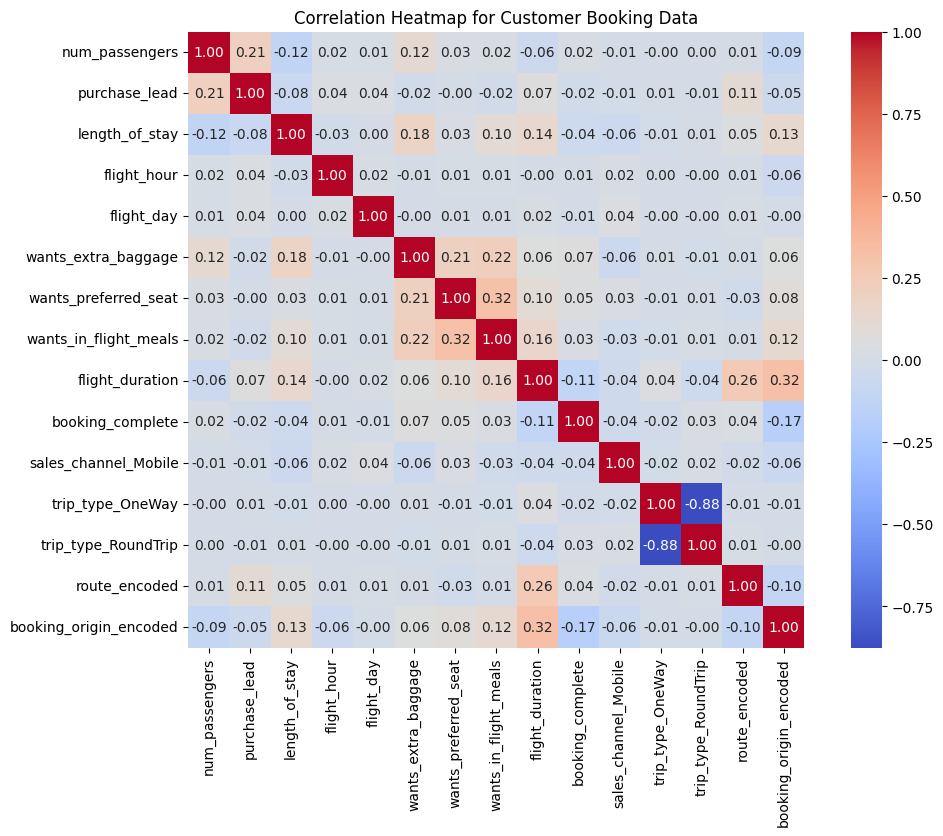

In [111]:
plt.figure(figsize=(12, 8))  # Set the size of the figure
sns.heatmap(data1.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap for Customer Booking Data')
plt.show()

In [134]:
X = data1.drop(['booking_complete','trip_type_OneWay'], axis=1)
y = data1['booking_complete']

In [125]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [138]:
X.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'sales_channel_Mobile',
       'trip_type_RoundTrip', 'route_encoded', 'booking_origin_encoded'],
      dtype='object')

In [136]:
X[['sales_channel_Mobile','trip_type_RoundTrip']] = X[['sales_channel_Mobile','trip_type_RoundTrip']].astype(int)

In [137]:
from sklearn.linear_model import LogisticRegression
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize oversampler
oversampler = RandomOverSampler(random_state=42)

# Model (replace with your preferred model)
model = LogisticRegression()

accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold + 1}")
    
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Upsample the training data
    X_train_upsampled, y_train_upsampled = oversampler.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_upsampled, y_train_upsampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

print("\nOverall Model Performance Across All Folds:")
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")

Fold 1


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.91      0.56      0.69      8378
           1       0.21      0.68      0.33      1479

    accuracy                           0.58      9857
   macro avg       0.56      0.62      0.51      9857
weighted avg       0.80      0.58      0.64      9857

Fold 2


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      0.48      0.62      8378
           1       0.19      0.70      0.30      1478

    accuracy                           0.51      9856
   macro avg       0.55      0.59      0.46      9856
weighted avg       0.79      0.51      0.57      9856

Fold 3


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.92      0.47      0.62      8378
           1       0.20      0.76      0.32      1478

    accuracy                           0.51      9856
   macro avg       0.56      0.61      0.47      9856
weighted avg       0.81      0.51      0.57      9856

Fold 4


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.91      0.47      0.62      8378
           1       0.19      0.73      0.31      1478

    accuracy                           0.51      9856
   macro avg       0.55      0.60      0.46      9856
weighted avg       0.80      0.51      0.57      9856

Fold 5
              precision    recall  f1-score   support

           0       0.90      0.47      0.61      8378
           1       0.19      0.70      0.30      1478

    accuracy                           0.50      9856
   macro avg       0.54      0.58      0.46      9856
weighted avg       0.79      0.50      0.57      9856


Overall Model Performance Across All Folds:
Accuracy: 0.5214
Precision: 0.7998
Recall: 0.5214
F1 Score: 0.5847


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize oversampler
oversampler = RandomOverSampler(random_state=42)

# Model: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100,         
    max_features='sqrt',      
    max_depth=None,           
    min_samples_split=2,      
    min_samples_leaf=1,       
    bootstrap=True,           
    random_state=42)

accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold + 1}")
    
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Upsample the training data
    X_train_upsampled, y_train_upsampled = oversampler.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_upsampled, y_train_upsampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

print("\nOverall Model Performance Across All Folds:")
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")


Fold 1
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8378
           1       0.42      0.20      0.27      1479

    accuracy                           0.84      9857
   macro avg       0.64      0.58      0.59      9857
weighted avg       0.80      0.84      0.81      9857

Fold 2
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8378
           1       0.43      0.20      0.28      1478

    accuracy                           0.84      9856
   macro avg       0.65      0.58      0.59      9856
weighted avg       0.81      0.84      0.82      9856

Fold 3
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8378
           1       0.43      0.20      0.27      1478

    accuracy                           0.84      9856
   macro avg       0.65      0.58      0.59      9856
weighted avg       0.80      0.84      0.81      9856

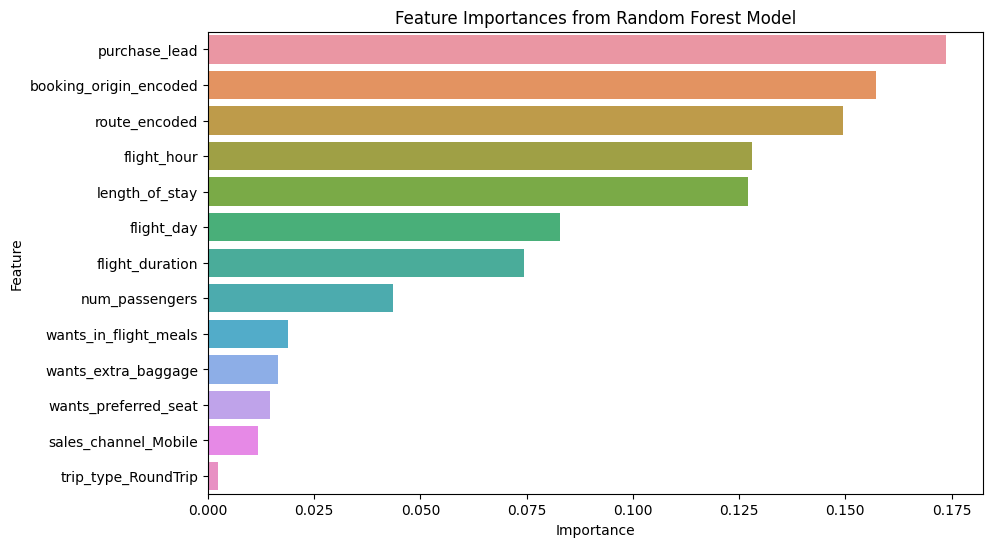

In [142]:
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

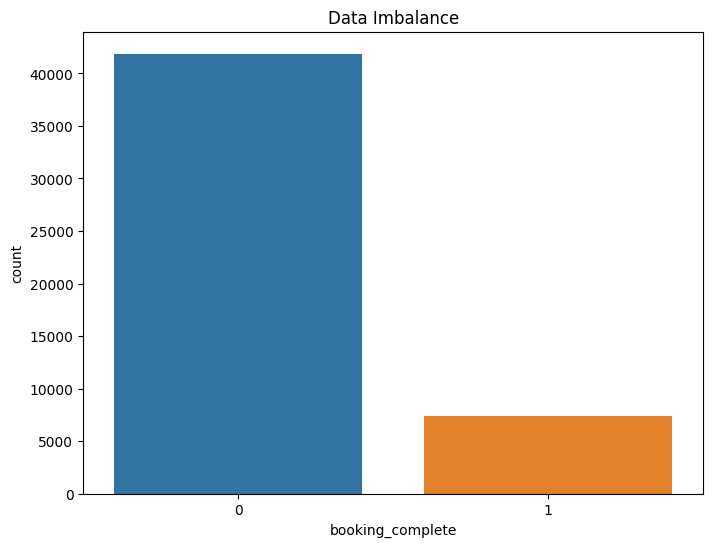

In [145]:
plt.figure(figsize=(8,6))
sns.countplot(x='booking_complete', data=data1)
plt.title('Data Imbalance')
plt.show()